# 11-4 在 Scikit-learn 中使用 SVM

注意事项：使用 SVM 之前应该对数据进行标准化。

例：只使用 2 个特征

C = 0.01 的时候，有一些点被错误分类。

画出两条平行于“决策边界”的直线，即间隔边界。

线性 SVM 有 coef_ ，也有 intercept_，是一个二维数组，因为，有 SVM 可以解决多分类问题。

hard margin 的时候，两条边界之间没有点，soft margin 的时候，两条边界之间有很多点。

注意参数的设置：
1. multi_class = 'ovr'
2. penalty = 'l2'

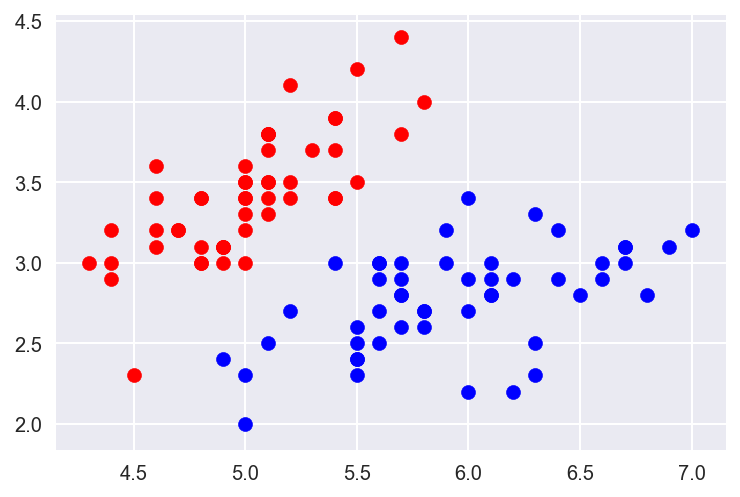

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y < 2, :2]
y = y[y < 2]

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

我们看到，数据集“基本是”线性可分的，所以我们可以使用线性 SVM 去完成分类，对于左下角的红色离群点，我们可以通过参数 C 来控制 soft margin 的程度。

**使用 SVM 之前，一定要对数据进行标准化**

In [2]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

注意：导入的是线性 SVC。

In [3]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

C = 1e9 （大）的时候，我们的模型趋向于去逼迫每一个 $\zeta$ 的值越来越小，即容错空间越小，越偏向于是 hard margin 的情况。

In [4]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

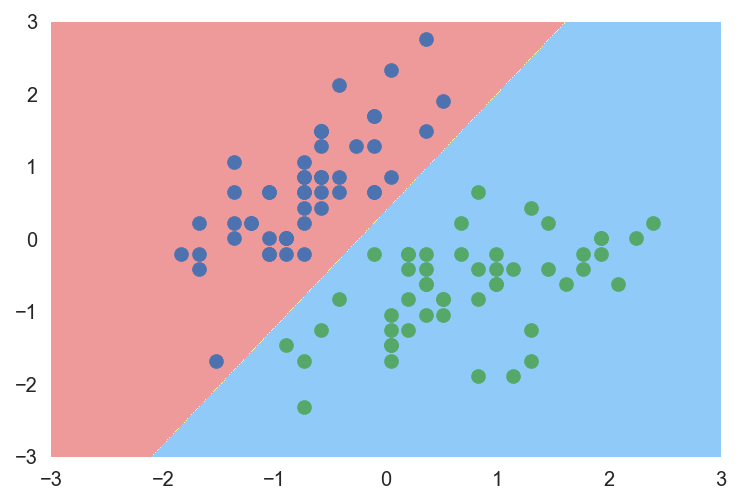

In [5]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

可以看到，这是 hard margin 的情况，所有的点都被超平面分对了。

In [6]:
svc.score(X_standard, y)

1.0

下面，我们将 C 的值设置成一个小数，转到 soft margin 的时候，看看决策边界。

In [7]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

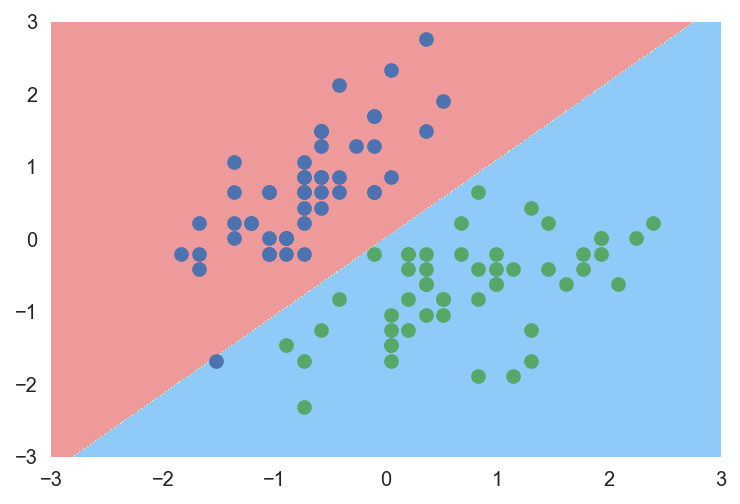

In [8]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

In [9]:
svc2.score(X_standard, y)

0.99

### 对于线性 SVM ，我们可以通过 coef_ 和 intercept 得到决策边界的表达式，进而画出间隔边界

In [10]:
svc.coef_

array([[ 4.03233733, -2.49296175]])

In [11]:
svc.intercept_

array([0.95365609])

In [12]:
def plot_svc_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]

    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0] / w[1] * plot_x - b / w[1] + 1 / w[1]
    down_y = -w[0] / w[1] * plot_x - b / w[1] - 1 / w[1]

    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

+ C = 1e9 时候的决策边界

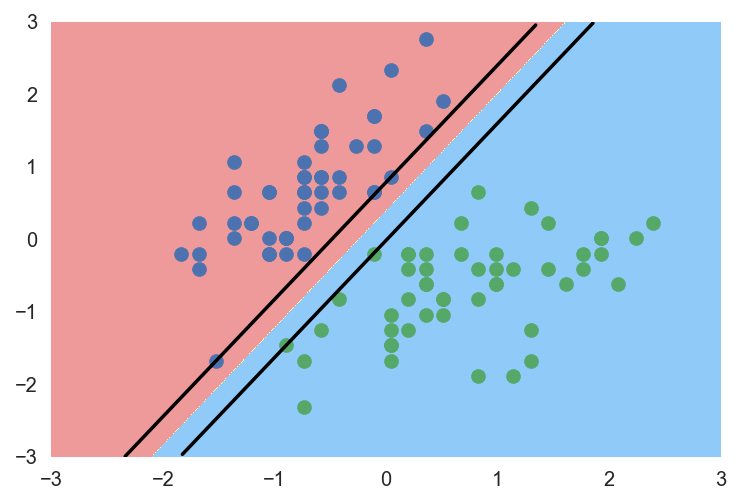

In [13]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

+ C = 0.01 时候的决策边界

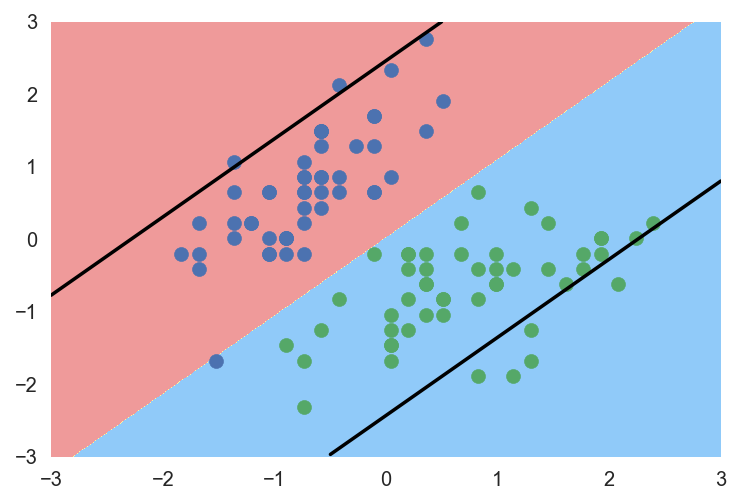

In [14]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

我们看到，分错了一个点，还有很多的数据点都落在了两个间隔边界之间。

In [17]:
c = 1e4
c

10000.0

In [18]:
c = 1e-4
c

0.0001